In [1]:
from data import*
from regression import*

# %matplotlib inline
from pycaret.regression import*
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [2]:
win_size = 20
step = 5

# Load
synth_data = DATA( dataset_name='synth', features=['synth_vind_1', 'synth_vind_2'], target='center_1')

# Split
train_synth_data, test_synth_data = synth_data.split(ratio=.95)

# Segment
train_synth_data_sg = train_synth_data.segment(win_size, step=step)
test_synth_data_sg = test_synth_data.segment(win_size, step=step)
# train_data = train_synth_data_sg.get_df()
# test_data = test_synth_data_sg.get_df()

# Features
train_synth_feature_sg = train_synth_data_sg.get_features()
test_synth_feature_sg = test_synth_data_sg.get_features()
train_data = train_synth_feature_sg.get_df()
test_data = test_synth_feature_sg.get_df()


In [3]:
exp_reg = setup(train_data,
                train_size = .7,
                target = 'target', 
                # normalize = True, 
                silent = True,
                session_id = 0
                )   


Setup Succesfully Completed!


In [24]:
model = tune_model('lightgbm')

IntProgress(value=0, description='Processing: ', max=16)

Initiated  . . . . . . . . . . . . . . . . . .              14:33:09
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
ETC        . . . . . . . . . . . . . . . . . .       Calculating ETC

Empty DataFrame
Columns: [MAE, MSE, RMSE, R2, RMSLE, MAPE]
Index: []

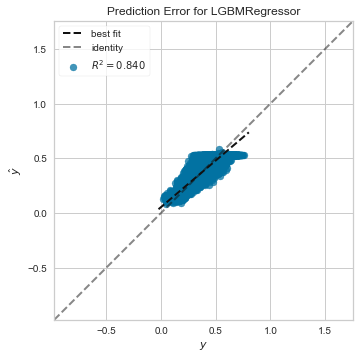

In [5]:
plot_model(model, plot='error')
# plot_model(model, plot='feature')

NRMSE = % 0.6136699646592197


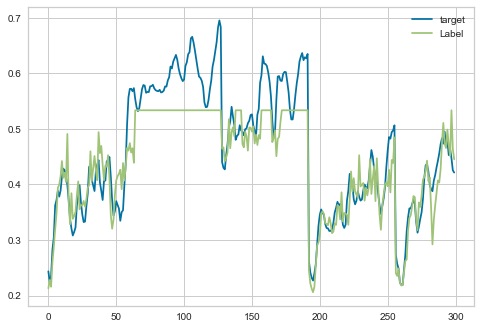

In [7]:
prediction = predict_model(model, data=test_data)
nrmse = mean_squared_error(prediction.target, prediction.Label) / np.nanmean(prediction.target) * 100
print('NRMSE = %', nrmse)

idx = np.arange(0,300)
ax = prediction.loc[idx,:].plot(y='target')
prediction.loc[idx,:].plot(y='Label', ax=ax)

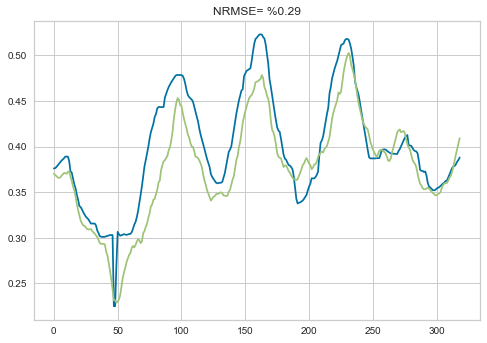

In [23]:
meas_data = DATA( dataset_name='arduino', features=['synth_vind_1', 'synth_vind_2'], target='center_1')
# meas_data = DATA( dataset_name='arduino', features=['vind_1', 'vind_2'], target='center_1')

data = meas_data.segment(win_size, step=1).select([4])
data = data.get_features()
data = data.get_df()

prediction = predict_model(model, data=data)
y_true = prediction.target.to_numpy()
y_pred = prediction.Label.to_numpy()
y_pred = signal.savgol_filter(y_pred, window_length=7, polyorder=1, axis=0)             

nrmse = round( mean_squared_error(y_true, y_pred) / np.nanmean(y_true) * 100, 2)

plt.plot(y_true)
plt.plot(y_pred)
plt.title( 'NRMSE= %' + str(nrmse) )
plt.show()


In [29]:
compare_models()